<a href="https://colab.research.google.com/github/Felipe-Furtado/Felipe-Furtado/blob/main/predicting_death_probability_in_heart_failure_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting death probability in Heart Failure using logistic regression

<h4> In this notebook we will use the dataset provided by Davide Chicco & Giuseppe Jurman  to predict the probability of fatal events according to clinical features in patients with heart failure </h4>

<p>A link to the full text is available <a href="https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5">here</href></p>

In [ ]:
#load packages
library(tidyverse)
#import data
data <- read.csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



<h4>After loading tidyverse and importing the data, we are ready for some exploratory analyses</h4>

In [ ]:
#exploratory analysis
head(data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [ ]:
str(data)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


<h4>We need to adjust the dichotomous variables as factors</h4>

In [ ]:
data$anaemia <- factor(data$anaemia, levels=c(0,1), labels=c("No","Yes"))
data$diabetes <- factor(data$diabetes, levels=c(0,1), labels=c("No","Yes"))
data$high_blood_pressure <- factor(data$high_blood_pressure, levels=c(0,1), labels=c("No","Yes"))
data$sex <- factor(data$sex, levels=c(0,1), labels=c("Female","Male"))
data$smoking <- factor(data$smoking, levels=c(0,1), labels=c("No","Yes"))
data$DEATH_EVENT <- factor(data$DEATH_EVENT, levels=c(0,1), labels=c("No","Yes"))

Double-check the structure

In [ ]:
str(data)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 2 2 2 1 2 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 1 1 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 2 1 1 1 2 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ smoking                 : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 2 1 2 1 2 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : 

<h4>Check for missing values</h4>

In [ ]:
sum(is.na(data))

[1] 0

<h3>Verify central tendencies and assess for bias</h3>

In [ ]:
summary(data)

      age        anaemia   creatinine_phosphokinase diabetes  ejection_fraction
 Min.   :40.00   No :170   Min.   :  23.0           No :174   Min.   :14.00    
 1st Qu.:51.00   Yes:129   1st Qu.: 116.5           Yes:125   1st Qu.:30.00    
 Median :60.00             Median : 250.0                     Median :38.00    
 Mean   :60.83             Mean   : 581.8                     Mean   :38.08    
 3rd Qu.:70.00             3rd Qu.: 582.0                     3rd Qu.:45.00    
 Max.   :95.00             Max.   :7861.0                     Max.   :80.00    
 high_blood_pressure   platelets      serum_creatinine  serum_sodium  
 No :194             Min.   : 25100   Min.   :0.500    Min.   :113.0  
 Yes:105             1st Qu.:212500   1st Qu.:0.900    1st Qu.:134.0  
                     Median :262000   Median :1.100    Median :137.0  
                     Mean   :263358   Mean   :1.394    Mean   :136.6  
                     3rd Qu.:303500   3rd Qu.:1.400    3rd Qu.:140.0  
              

<h4>So M is about 2x F, same for no-smokers and no events, which are also majority. Having fewer events than non-events is expected, but had to be accounted for so that the predictions are not based only on the majority groups. For example, as males tend to have more heart disease than females, one could pottentially predict better than chance alone just by assigning every male to event and every female to non-event.</h4>
<p>We may test such hypothesis with a <b>Chi-Squared</b> test given dichotomous predictors and dichotomous outcomes</p>

In [ ]:
xtabs(~DEATH_EVENT+sex, data = data)
chisq.test(data$sex, data$DEATH_EVENT)

           sex
DEATH_EVENT Female Male
        No      71  132
        Yes     34   62


	Pearson's Chi-squared test with Yates' continuity correction

data:  data$sex and data$DEATH_EVENT
X-squared = 0, df = 1, p-value = 1


<h4>Contrary to expectation, sex alone is not significantly attached to the outcome in this dataset, as denoted by the high p-value.
In this case, we failed to reject the null hypothesis that males and females have the same death event rates.</h4>

Before addressing the imbalances, we will divide the sample into training and testing. We will use an 80/20 split for training and test data,respectively.

First, create an index:

In [ ]:
data$id <- c(1:nrow(data))
data <-relocate(data, id, .before=age)
head(data)

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<int>,<dbl>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<fct>,<fct>,<int>,<fct>
1,1,75,No,582,No,20,Yes,265000,1.9,130,Male,No,4,Yes
2,2,55,No,7861,No,38,No,263358,1.1,136,Male,No,6,Yes
3,3,65,No,146,No,20,No,162000,1.3,129,Male,Yes,7,Yes
4,4,50,Yes,111,No,20,No,210000,1.9,137,Male,No,7,Yes
5,5,65,Yes,160,Yes,20,No,327000,2.7,116,Female,No,8,Yes
6,6,90,Yes,47,No,40,Yes,204000,2.1,132,Male,Yes,8,Yes


Now we sample the training data, and subtract it from the whole to define the test data

In [ ]:
train_data <- slice_sample(data, n = (nrow(data)*0.8), replace = FALSE)
nrow(train_data)

[1] 239

In [ ]:
test_data <- filter(data, (data$id %in% train_data$id) == FALSE)
nrow(test_data)

[1] 60

We proceed to train a model using logistic regression

In [ ]:
model <- glm(DEATH_EVENT~.-time -id, data=train_data, family="binomial")
summary(model)


Call:
glm(formula = DEATH_EVENT ~ . - time - id, family = "binomial", 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2785  -0.7740  -0.4732   0.7745   2.4827  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               3.556e+00  5.223e+00   0.681   0.4960    
age                       5.983e-02  1.469e-02   4.072 4.67e-05 ***
anaemiaYes                5.895e-01  3.448e-01   1.710   0.0873 .  
creatinine_phosphokinase  1.744e-04  1.884e-04   0.925   0.3548    
diabetesYes               1.649e-01  3.383e-01   0.488   0.6259    
ejection_fraction        -6.886e-02  1.709e-02  -4.028 5.62e-05 ***
high_blood_pressureYes    4.131e-01  3.462e-01   1.193   0.2328    
platelets                 6.262e-07  1.929e-06   0.325   0.7455    
serum_creatinine          7.561e-01  2.351e-01   3.217   0.0013 ** 
serum_sodium             -5.223e-02  3.736e-02  -1.398   0.1621    
sexMale                  -3.

Make test predictions

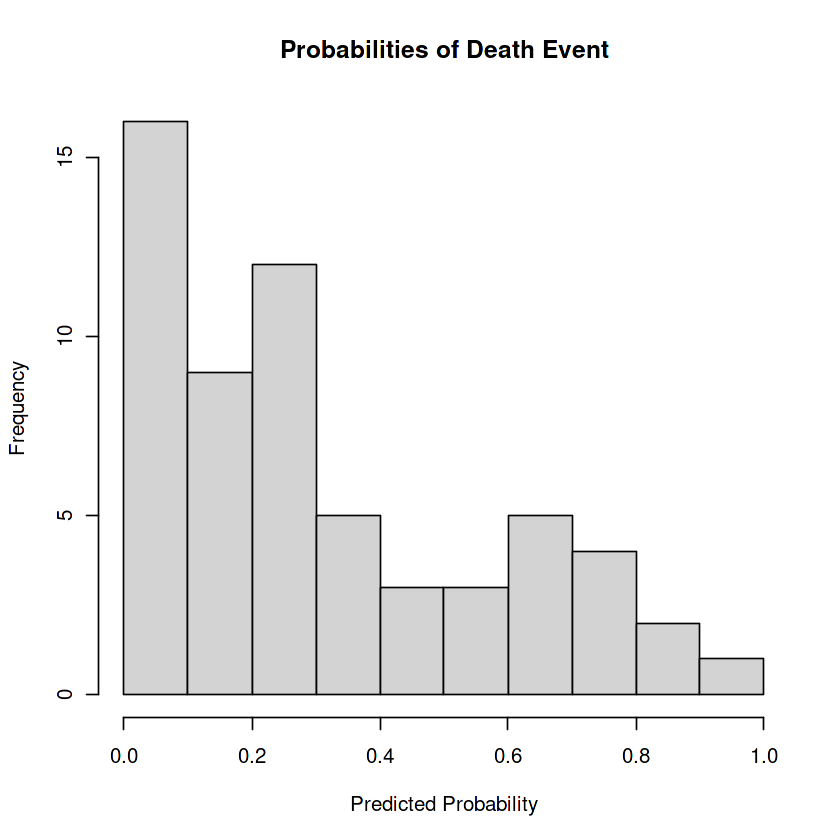

In [ ]:
predictions <- predict(model, test_data, type='response')
hist(predictions, xlab="Predicted Probability", main="Probabilities of Death Event")

<p>Now we have a vector of predicted probabilities, between 0 and 1, of death event predicted by our model. We can compare these raw predictions with the real outcomes.</p>

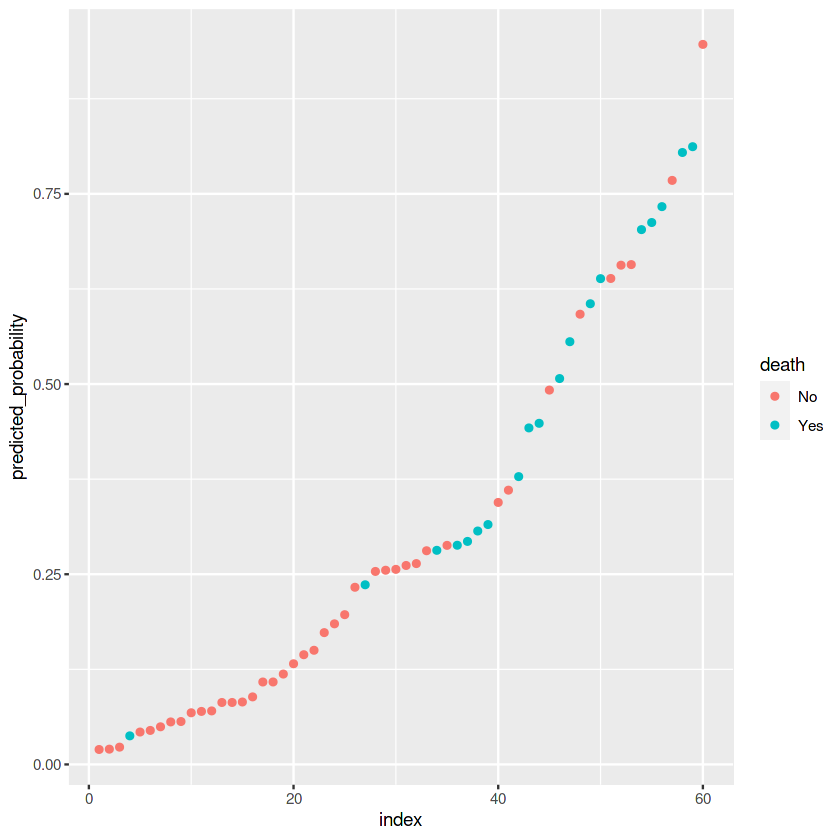

In [ ]:
df <- data.frame(predicted_probability=predictions,death=test_data$DEATH_EVENT)
df <- arrange(df, predicted_probability)
df$index <- 1:nrow(df)
df %>%
    ggplot()+geom_point(aes(x=index,y=predicted_probability, color=death))

This chart is useful to help select the most appropriate cutoff value. If we use the standard 0.5 cutoff, the results won't be the most accurate.

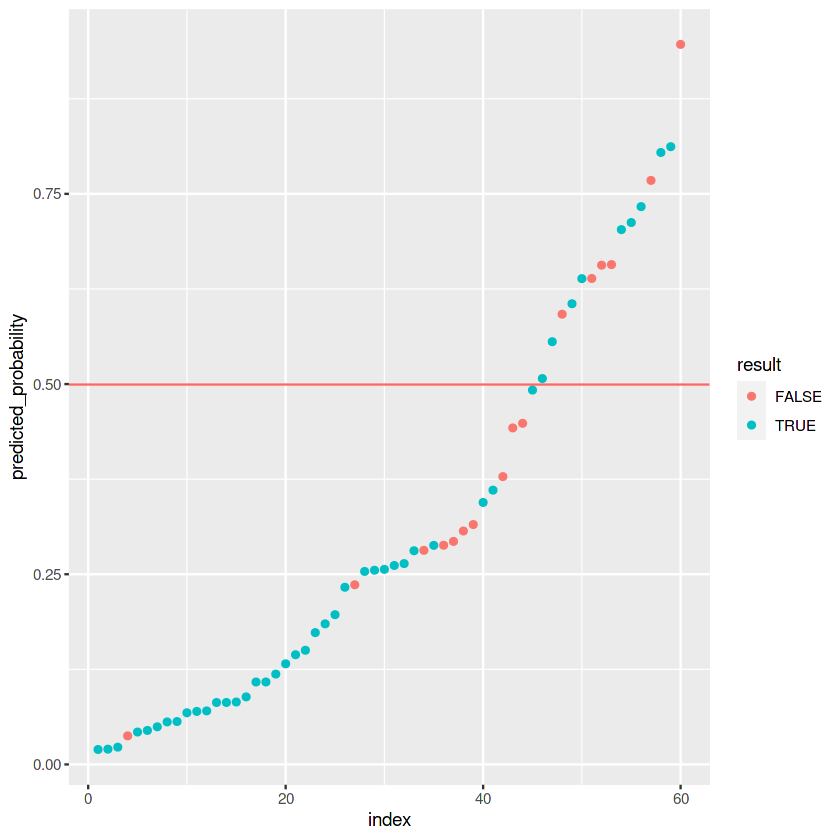

In [ ]:
df$predicted_event <- as.factor(ifelse(df$predicted_probability >= 0.5, "Yes","No"))
df$result <- ifelse(df$predicted_event==df$death,TRUE,FALSE)
df %>%
    ggplot()+geom_point(aes(x=index,y=predicted_probability, color=result))+
    geom_hline(yintercept=0.5, color='red', alpha=0.6)

In [ ]:
confusion_matrix <- xtabs(~predicted_event+death, data=df)
confusion_matrix

               death
predicted_event No Yes
            No  35  10
            Yes  6   9

Looking at the confusion matrix for this example, we see that a 0.5, or 50% predicted probability cutoff, yields 35 true negatives, 9 true positives, 5 false positives, and 11 false negatives. This gives us:

In [ ]:
cat(" Sensitivity = ",confusion_matrix[4]/(confusion_matrix[4]+confusion_matrix[3]),"\n",
    "Specificity = ", confusion_matrix[1]/(confusion_matrix[1]+confusion_matrix[2]),"\n",
    "Accuracy = ", (confusion_matrix[1]+confusion_matrix[4])/(confusion_matrix[1]+confusion_matrix[2]+confusion_matrix[3]+confusion_matrix[4]))

 Sensitivity =  0.4736842 
 Specificity =  0.8536585 
 Accuracy =  0.7333333

The sensitivity this approach gave us is pretty bad, we are missing a lot of cases. Thankfully, there is a resource that can allow us to select the optimal cutoff, the Receiver Operator Curve (ROC).

In [ ]:
library(pROC)
roc <- roc(df, response=death, predictor=predicted_probability)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = No, case = Yes

Setting direction: controls < cases




Call:
roc.data.frame(data = df, response = death, predictor = predicted_probability)

Data: predicted_probability in 41 controls (death No) < 19 cases (death Yes).
Area under the curve: 0.8062


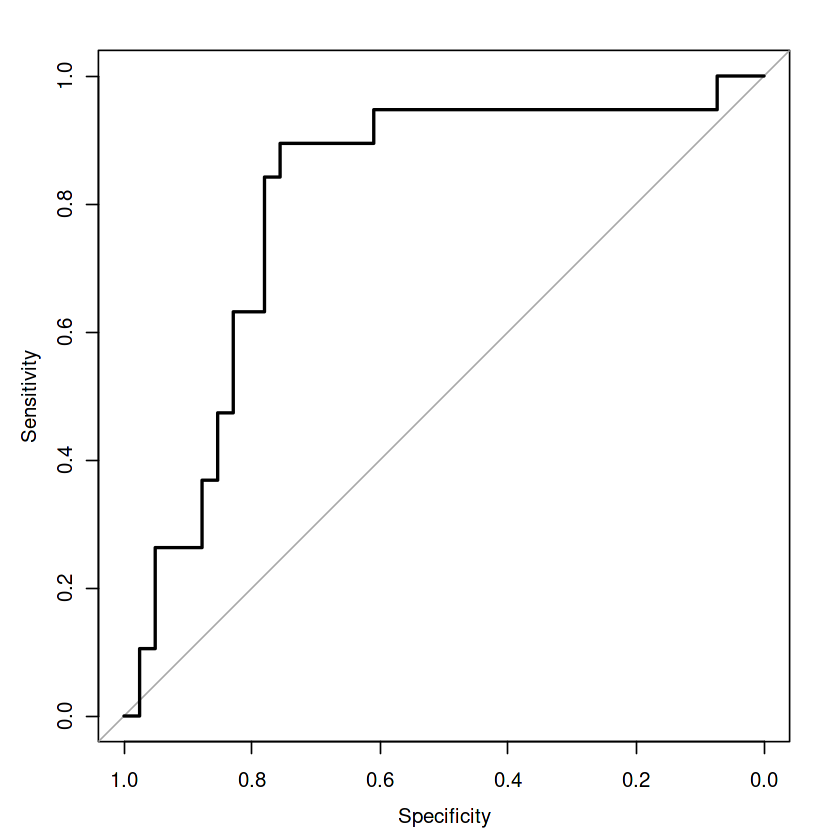

In [ ]:
plot(roc)
print(roc)

The optimal point is the one closest to the top left of the chart, indicating the highest sensitivity and specificity possible for the model (note that the x axis is inverted in this kind of chart).

In [ ]:
threshold<-coords(roc, x='best', best.method='closest.topleft')
threshold

threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.2811617,0.7560976,0.8947368


Let's redraw our prediction plot using this threshold, and color the correct and incorrect results

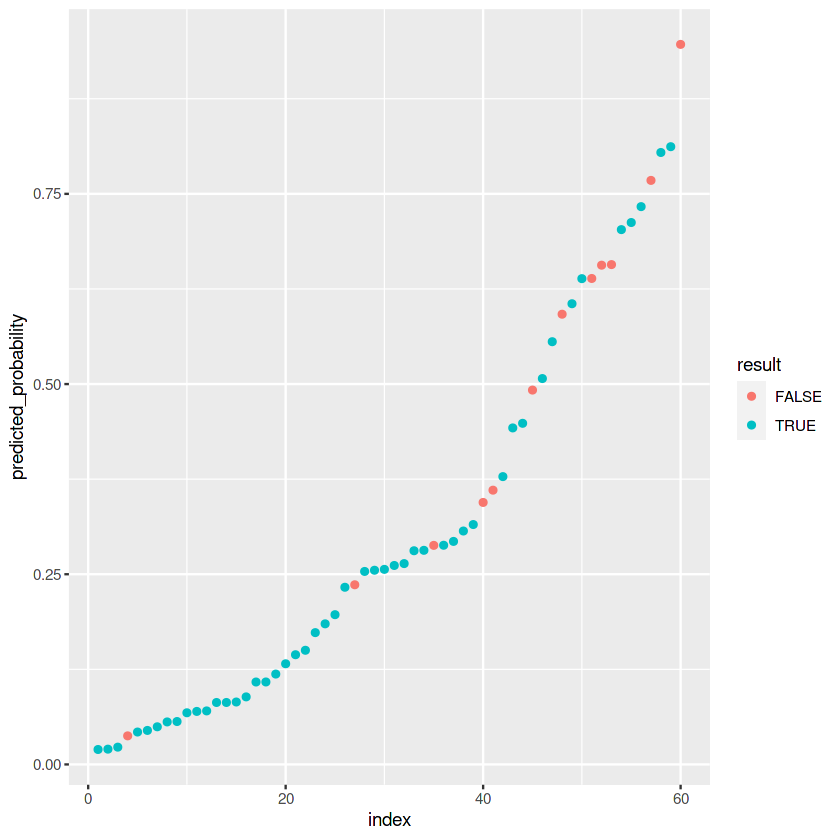

In [ ]:
df$predicted_event <- as.factor(ifelse(df$predicted_probability>=threshold$threshold, "Yes","No"))
df$result <- ifelse(df$predicted_event==df$death,TRUE,FALSE)
df %>%
    ggplot()+geom_point(aes(x=index,y=predicted_probability, color=result))

In [ ]:
confusion_matrix <- xtabs(~predicted_event+death,data=df)
confusion_matrix
cat(" Sensitivity = ",confusion_matrix[4]/(confusion_matrix[4]+confusion_matrix[3]),"\n",
    "Specificity = ", confusion_matrix[1]/(confusion_matrix[1]+confusion_matrix[2]),"\n",
    "Accuracy = ", (confusion_matrix[1]+confusion_matrix[4])/(confusion_matrix[1]+confusion_matrix[2]+confusion_matrix[3]+confusion_matrix[4]))

               death
predicted_event No Yes
            No  31   2
            Yes 10  17

 Sensitivity =  0.8947368 
 Specificity =  0.7560976 
 Accuracy =  0.8

Selecting the adequate threshold improves the model's performance. There are other approaches to improve the model, such as feature selection and engineering, that will not be described here.